In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [32]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [6]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)

# reflect the tables


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement



In [9]:

station =  Base.classes.station


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)



# Exploratory Precipitation Analysis

In [11]:
# Display the row's columns and data in dictionary format -measurement (I added this from an in class activity)

first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2100b1c9ac8>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [142]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [12]:
# Oldest/earliest Date in data set (I added this from class activity to know more about data)
session.query(measurement.date).order_by(measurement.date).first()

('2010-01-01')

In [13]:
# Find the most recent date in the data set.

session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


In [15]:
#recent date varible for forumlas - .date was from web allowed variable to not be a tuple/list
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first().date
recent_date

'2017-08-23'

In [16]:
# Calculate the date one year from the last date in data set.
last_twelve_months = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)
last_twelve_months

datetime.datetime(2016, 8, 23, 0, 0)

In [17]:
# Perform a query to retrieve the data and precipitation scores
precip_data =session.query(measurement.date, func.avg(measurement.prcp)).\
    filter(measurement.date >= last_twelve_months).\
    group_by(measurement.date).all()
precip_data

[('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),
 ('2016-09-22', 

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
Precip_df = pd.DataFrame(precip_data, columns=['date', 'Daily Av. Precipitation'])
Precip_df.set_index('date', inplace=True)
Precip_df

,Daily Av. Precipitation
date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


In [19]:
# Sort the dataframe by date
Precip_df.sort_values('date', ascending = True)
Precip_df

,Daily Av. Precipitation
date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


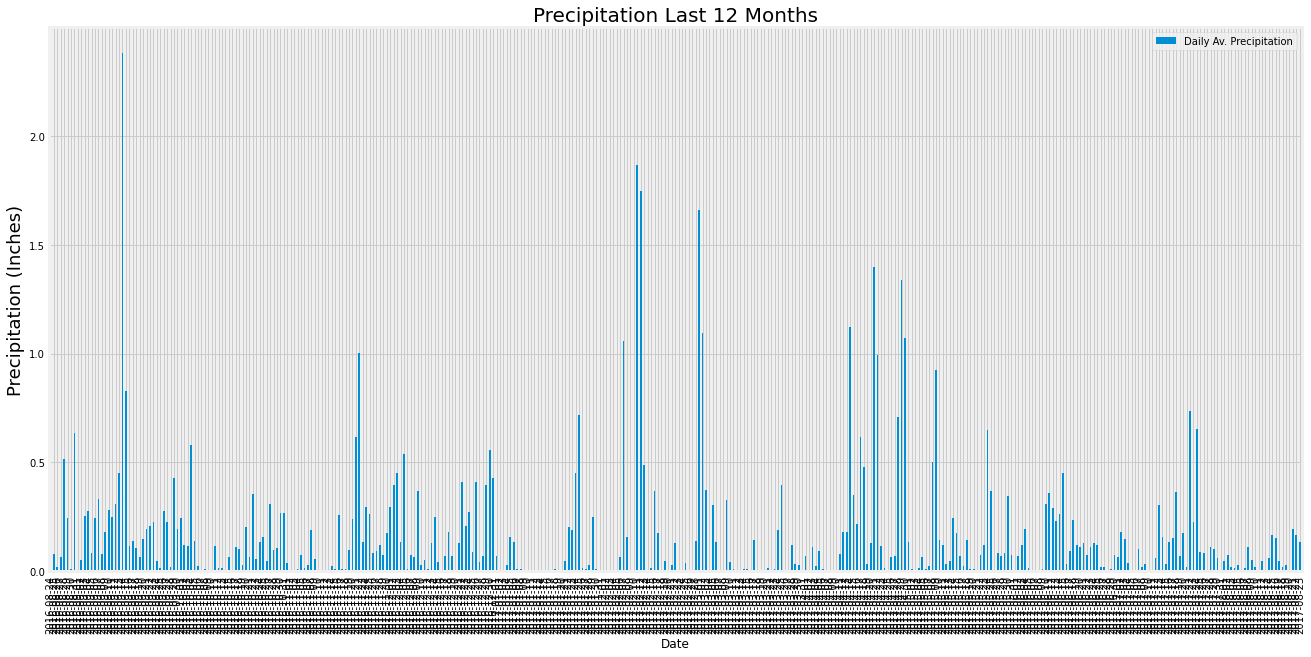

In [60]:
# Use Pandas Plotting with Matplotlib to plot the data


Precip_df.plot.bar(figsize=(20,10))
#plt.tight_layout()
plt.legend(fontsize="10")
plt.title("Precipitation Last 12 Months", size=20)
plt.ylabel("Precipitation (Inches)", size=18)
plt.xlabel("Date", size=12)
plt.show()

In [21]:
#wanted to try to get the average monthly precip and then plot since 365 days on a plot is too busy - will attempt later

# monthly_av = Precip_df.groupby('date').agg(np.mean)[['Daily Av. Precipitation']]
# monthly_av

# monthly_av = Precip_df.groupby(Precip_df['date'].dt.strftime('%B'))['Daily Av. Precipitation'].np.mean().sort_values()
# monthly_av

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Precip_df.describe()

,Daily Av. Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [23]:
# Exploratory Station Analysis

engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [24]:
# Display the row's columns and data in dictionary format - station
station_dict = session.query(station).first()
station_dict.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2100c112128>,
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'id': 1,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US'}

In [25]:
session.query(station.station).limit(5).all()

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838')]

In [26]:
# Design a query to calculate the total number stations in the dataset
number_stations = session.query(station.station).count()
number_stations

9

In [27]:
#I wanted to see the list of stations to verify there were 9 distinct
station_list = session.query(station.station).\
            group_by(station.station)
# station_list

for record in station_list:
    print(record)
        

('USC00511918',)
('USC00513117',)
('USC00514830',)
('USC00516128',)
('USC00517948',)
('USC00518838',)
('USC00519281',)
('USC00519397',)
('USC00519523',)


In [33]:

inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [36]:
# Get a list of column names and types


columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [37]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [54]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

most_active=session.query(measurement.station, func.count(measurement.station)).\
            group_by(measurement.station).\
            order_by(func.count(measurement.station).desc()).first()

most_active


('USC00519281', 2772)

In [38]:
# table_join= session.query(measurement, station).filter(measurement.station ==  station.station).all()

# for record in table_join:
#     (measurement)=record
#     print(measurement.station)

# sel = [measurement.station, measurement.date, measurement.prcp, measurement.tobs,station.station,station.name,station.latitude, station.longitude, station.elevation ]
# same_station= session.query(*sel).filter(measurement.station == station.station).limit(10).all()

# for record in same_station:
#     (ea_fam, ea_gen, ea_spec, na_fam, na_gen, na_spec) = record
#     print(
#         f"The European animal '{ea_fam} {ea_gen} {ea_spec}'"
#         f"belongs to the same sporder as the North American animal '{na_fam} {na_gen} {na_spec}'.")


In [49]:
# List the stations and the counts in descending order.
active_stations=session.query(measurement.station, func.count(measurement.station)).\
            group_by(measurement.station).\
            order_by(func.count(measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [55]:
most_active_station=most_active.station
results

'USC00519281'

In [57]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_temps=session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
                filter(measurement.station == most_active_station).all()
most_active_temps

[(54.0, 71.66378066378067, 85.0)]

In [65]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_precip_data=session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >= last_twelve_months).\
    filter(measurement.station == most_active_station).\
    group_by(measurement.date).all()
most_active_precip_data

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [67]:
#histogram

histo_df = pd.DataFrame(most_active_precip_data)
#histo_df.set_index('', inplace=True)
histo_df.head()



,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0


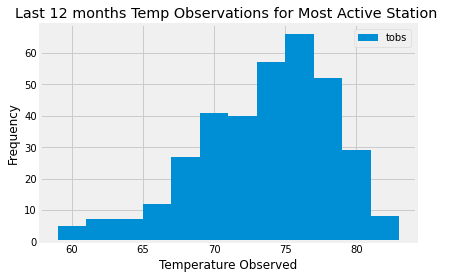

In [73]:
histo_df.plot.hist(by='tobs', bins=12)
plt.title("Last 12 months Temp Observations for Most Active Station ")
plt.xlabel("Temperature Observed")
plt.show()

# Close session

In [127]:
# Close Session
session.close()